## TITLE:   DRIVER DROWSINESS DETECTION

##### BY  Beta_Hackers : (VIKASH ,SAHIN, BIBHUTI, ASHUTOSH)

# INTRODUCTION :

### A lot of  drivers feel lazy or sleepy some times which could lead to fatal accidents.  Various studies states that around 30-40% accidents occur due to drowsy driver.To reduce these accidents, a system should be developed which can identify the expressions of the driver by the car camera setup and then alert the person in advance. This could save a lot of lives. ​This project is focused on  detecting drowsiness of the driver based on images and alert them before hand. Therefore,  a AI  model is built which can help achieve this with sufficient accuracy and safety.​

# PROBLEM STATEMENT:

#### TO PREDICT THE PHYSICAL CONDITION OF THE DRIVER BASED ON TRAINING IMAGES GIVEN WITH OPEN EYE,CLOSED EYE, YAWNING,NO YAWNING, WITH BETTER ACCURACY AND LESS TIME.

## METHODOLOGY:

### Our solution to this problem is to build a detection system that identifies key attributes of drowsiness and     triggers an alert   when someone is drowsy before it is too late.
### We followed the below methodlogy for our solution 
### 1.VISUALISE AND INSPECT THE DATA
### 2.PREPROCESS THE DATA AND PREPARE FOR CNN MODEL.
### 3.TRAIN DIFFERENT MODELS AND EVALUATE THEIR PERFORMANCE.
### 4.ANALYSE THE RESULTS OBTAINED.
### 5.FINALLY DRAW IMPORTANT CONCLUSION .

# DATASET USED:

### LINK: https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new
### IMAGE CLASSES/LABELS:['Closed', 'no_yawn', 'Open', 'yawn']
### EACH CLASS HAS 617 IMAGES IN TRAINING SET
### EACH CLASS HAS 109 IMAGES IN TEST SET

### HERE EYES OPEN , NO YWAN MEANS DRIVER IS NOT DROWSY.
### HERE EYES CLOSED, YAWN MEANS DRIVER IS DRWOSY 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [2]:
!pip install pandas


# VISUALISING THE DATA

In [3]:
#GETTING IMAGE LABELS
labels = os.listdir(r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train")


In [4]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['Closed' 'Open' 'no_yawn' 'yawn']


## FUNCTION TO VIEW A RANDOM IMAGE

In [7]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (253, 251, 3)


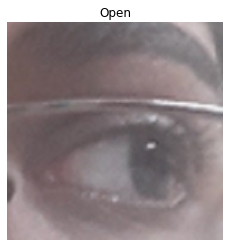

In [10]:
img = view_random_image(target_dir=r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train/",
                        target_class="Open")

Image shape: (300, 354, 3)


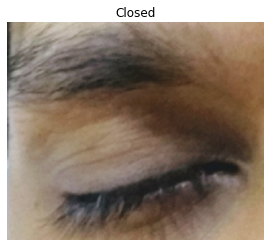

In [11]:
img = view_random_image(target_dir=r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train/",
                        target_class="Closed")

Image shape: (480, 640, 3)


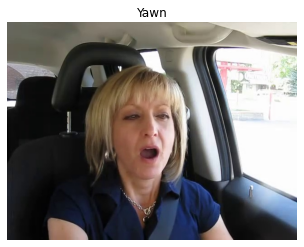

In [12]:
img = view_random_image(target_dir=r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train/",
                        target_class="Yawn")

Image shape: (480, 640, 3)


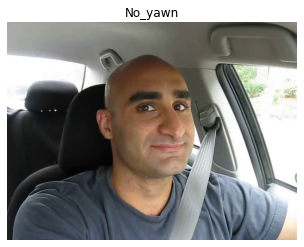

In [13]:
img = view_random_image(target_dir=r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train/",
                        target_class="No_yawn")

### We can see that images are of different shape, they are colored and of different people driving with eyes open,closed,yawning and no yawning

# FUNCTION TO CREATE TRAINING DATA WITH LABELS

In [14]:
Datadirectory = r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train/"
training_data = []
img_size = 224

def create_training_data():
  for category in labels:
      path = os.path.join(Datadirectory, category)
      class_num = labels.index(category)
      for img in os.listdir(path):
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])
       

In [15]:
create_training_data()

In [16]:
len(training_data)

2701

In [17]:
import random
random.shuffle(training_data)

In [18]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

In [19]:
X=np.array(X)
y=np.array(y)

In [20]:
X.shape

(2701, 224, 224, 3)

In [21]:
y.shape

(2701,)

In [22]:
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [23]:
X.shape

(2701, 224, 224, 3)

In [24]:
y

array([2, 3, 0, ..., 1, 0, 1])

In [25]:
#RESCALE THE TRAIN DATA
X=X/255

# FUNCTION TO CREATE TEST DATA

In [26]:
Datadirectory = r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\test/"
test_data = []
img_size = 224

def create_test_data():
  for category in labels:
      path = os.path.join(Datadirectory, category)
      class_num = labels.index(category)
      for img in os.listdir(path):
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           test_data.append([new_array, class_num])

In [27]:
create_test_data()

In [29]:
import random
random.shuffle(test_data)

In [35]:
#here we reshape the image.
X_test = []
y_test = []
for features, label in test_data:
  X_test.append(features)
  y_test.append(label)

In [36]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [37]:
X_test=X_test/255

In [38]:
X_test.shape

(501, 224, 224, 3)

# MODEL BUILDING:

## 1.BASELINE MODEL: we first built a simple model without data augmentation.

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="sparse_categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [41]:
# Fit the model
history_1 = model_1.fit(X,y,# now 10 different classes 
                        epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
85/85 [==============================] - 13s 72ms/step - loss: 1.1601 - accuracy: 0.5093 - val_loss: 0.8122 - val_accuracy: 0.6467
Epoch 2/10
85/85 [==============================] - 2s 26ms/step - loss: 0.5077 - accuracy: 0.7800 - val_loss: 0.5464 - val_accuracy: 0.8044
Epoch 3/10
85/85 [==============================] - 2s 25ms/step - loss: 0.4278 - accuracy: 0.8228 - val_loss: 0.5396 - val_accuracy: 0.8104
Epoch 4/10
85/85 [==============================] - 2s 26ms/step - loss: 0.3591 - accuracy: 0.8479 - val_loss: 0.5659 - val_accuracy: 0.8064
Epoch 5/10
85/85 [==============================] - 2s 26ms/step - loss: 0.2427 - accuracy: 0.9044 - val_loss: 0.4534 - val_accuracy: 0.8583
Epoch 6/10
85/85 [==============================] - 2s 26ms/step - loss: 0.2002 - accuracy: 0.9188 - val_loss: 0.5946 - val_accuracy: 0.8263
Epoch 7/10
85/85 [==============================] - 2s 26ms/step - loss: 0.1951 - accuracy: 0.9279 - val_loss: 0.4889 - val_accuracy: 0.8383
Epoch 8/10
8

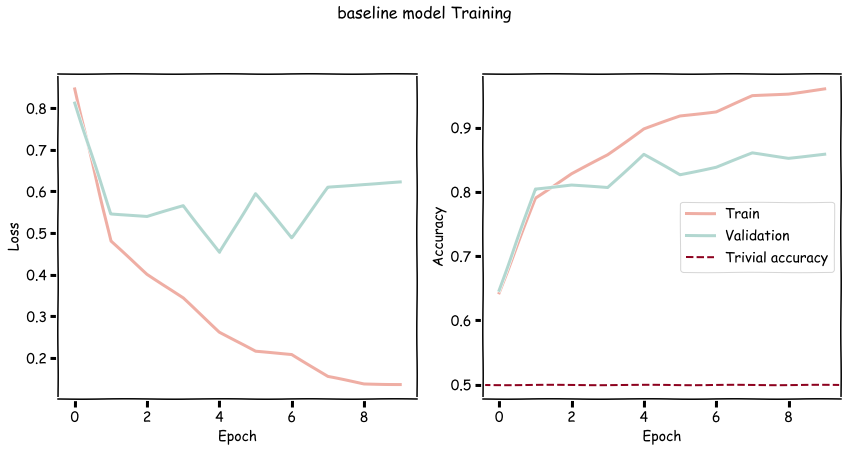

In [42]:
#FUNCTION TO PLOT THE HISTORY
def plot_history(history, name):
    with plt.xkcd(scale=0.2):
      fig, ax = plt.subplots(1,2, figsize=(12,6))
      for i, metric in enumerate(['loss', 'accuracy']): 
          ax[i].plot(history.history[metric], label='Train', color='#EFAEA4',linewidth=3)
          ax[i].plot(history.history[f'val_{metric}'], label='Validation', color='#B2D7D0',linewidth=3)
          if metric == 'accuracy': 
            ax[i].axhline(0.5, color='#8d021f', ls='--', label='Trivial accuracy')
            ax[i].set_ylabel("Accuracy", fontsize=14)
          else:
            ax[i].set_ylabel("Loss", fontsize=14)
          ax[i].set_xlabel('Epoch', fontsize=14)

      plt.suptitle(f'{name} Training', y=1.05, fontsize=16)
      plt.legend(loc='best')
      plt.tight_layout()
plot_history(history_1,'baseline model')

### we can see that the baseline model is performing fairly well with 96.19% train accuracy and 85.83 percent validation accuracy

# Evaluation of base model

In [43]:

y_pred=[]

for i in X_test:
    y_pred.append(model_1.predict(np.expand_dims(i,axis=0)).argmax())
    

In [44]:
!pip install seaborn

In [45]:
import seaborn as sns

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[109,   0,  10,   0],
       [  3, 105,   9,  13],
       [ 18,   2, 124,   0],
       [  0,  15,   1,  92]], dtype=int64)

<AxesSubplot:>

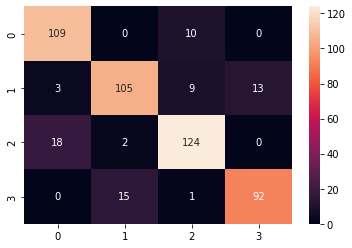

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='')

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       119
           1       0.86      0.81      0.83       130
           2       0.86      0.86      0.86       144
           3       0.88      0.85      0.86       108

    accuracy                           0.86       501
   macro avg       0.86      0.86      0.86       501
weighted avg       0.86      0.86      0.86       501



# PLOTTING FEATURE MAPS:


*The feature maps of a CNN capture the result of applying the filters to an input image . I.e at each layer, the feature map is the output of that layer. The reason for visualising a feature map for a specific input image is to try to gain some understanding of what features our CNN detects.*

In [49]:
#plotting feature map function
def plot_featuremaps(img,activations,layer_names):
    fig, axs = plt.subplots(ncols=4, nrows=3,figsize = (6,6))
    gs = axs[1, 2].get_gridspec()
    # remove the underlying axes
    for ax in axs[1:-1, 1:-1]:
        ax[0].remove()
        ax[1].remove()
    axbig = fig.add_subplot(gs[1:-1, 1:-1])

    axbig.imshow(img.squeeze() + 0.5)
#     axbig.set_title(f'{cifar10dict[np.argmax(model.predict(img))]}')
    axbig.axis('off')

    for i, axis in enumerate(axs.ravel()):
        axis.imshow(activations.squeeze()[:,:,i-2], cmap='gray')
        axis.axis('off')

    fig.tight_layout()
    fig.suptitle(f'Feature maps for {layer_names[0]}',size=16,y=1.05);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


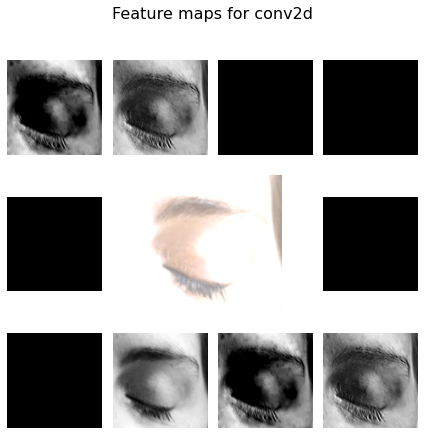

In [50]:
#feature map for first convolutional layer
layer0_output = model_1.layers[0].output
activation_model = tf.keras.Model(inputs = model_1.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model_1.layers[0].name])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


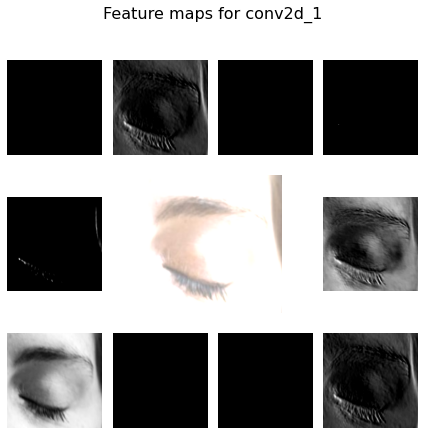

In [51]:
#feature map for second convolutional layer
layer0_output = model_1.layers[1].output
activation_model = tf.keras.Model(inputs = model_1.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model_1.layers[1].name])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


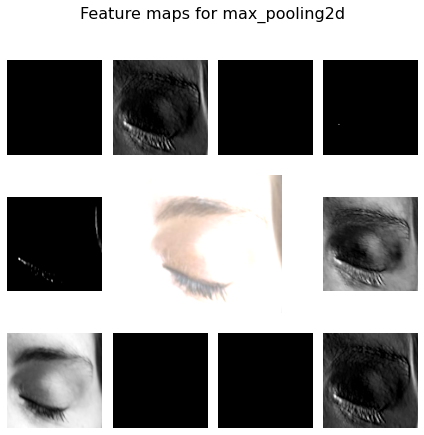

In [52]:
#feature map for  maxpool layer
layer0_output = model_1.layers[2].output
activation_model = tf.keras.Model(inputs = model_1.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model_1.layers[2].name])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


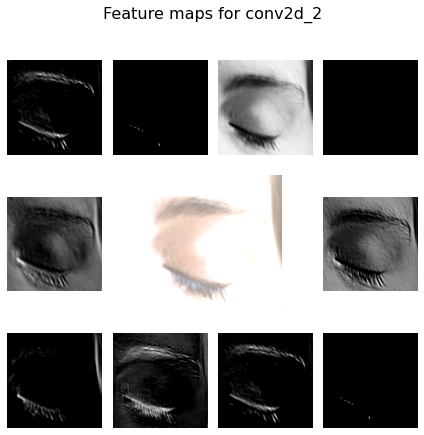

In [53]:
##feature map for 4th convolutional layer
layer0_output = model_1.layers[3].output
activation_model = tf.keras.Model(inputs = model_1.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model_1.layers[3].name])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


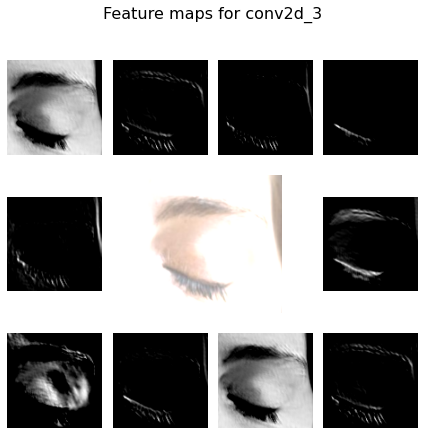

In [54]:
#feature map for last convolutional layer
layer0_output = model_1.layers[4].output
activation_model = tf.keras.Model(inputs = model_1.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model_1.layers[4].name])

# INFERENCES FROM FEATURE MAPS:
we can observe that each convoultion layer is detecting the important features of images very well which is why model is performing  well.

# PLOTTING GRADCAM VISUALISATION:
One way to  visualizing what CNNs are actually looking at, is by  using Grad-CAM. Gradient weighted Class Activation Map (Grad-CAM) produces a heat map that highlights the important regions of an image by using the gradients of the target of the final convolutional layer. 

In [55]:
#source-https://keras.io/examples/vision/grad_cam/
# Function to expand the dimension of the input image
def get_img_array(img_array, size):
    array = np.expand_dims(img_array, axis=0)
    return array

#Function to plot GradCam
def make_gradcam_heatmap(img_array, model,conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Predicted: [[9.9991381e-01 4.4471599e-05 2.8942004e-05 1.2730905e-05]]


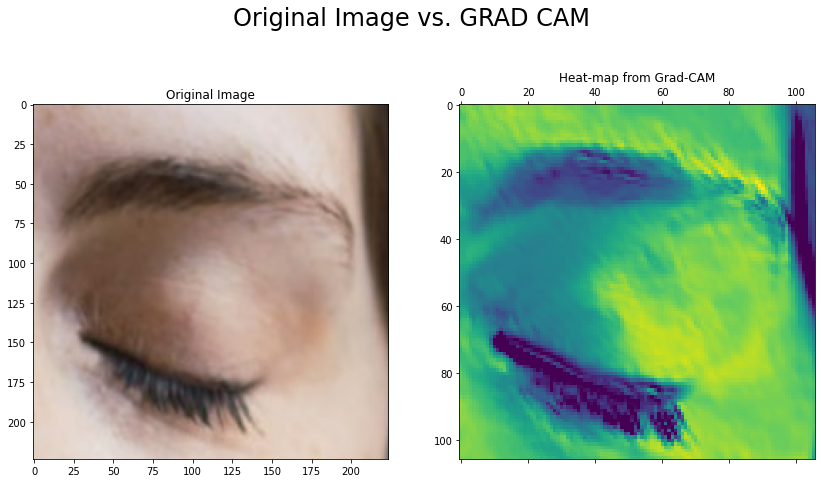

In [56]:
img_array =X_test[1]
conv_layer_name = 'conv2d_3'
# Make model

# Remove last layer's softmax
model_1.layers[-1].activation=None

# Print what the top predicted class is
preds = model_1.predict(np.expand_dims(X_test[1],axis=0))
print("Predicted:",preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(np.expand_dims(img_array,axis=0)*255, model_1,conv_layer_name)
#saliency=saliency_graphs(model, np.expand_dims(x_test_data[0][0], axis=0))
# Display heatmap
fig,ax = plt.subplots(1,2, figsize=(14,8))
ax[0].imshow(X_test[1])
ax[1].matshow(heatmap)
ax[1].set_title('Heat-map from Grad-CAM')
ax[0].set_title('Original Image')
fig.suptitle('Original Image vs. GRAD CAM', fontsize = 24)
plt.show()

FROM THE GRAD CAM VISUALISATION WE CAN CLEARLY UNDERSTAND WHAT OUR MODEL IS SEEING IN TRAINING IMAGES. 

In [57]:
model_1.save('model1.h5')

In [58]:
model_1.save_weights('model1weights.h5')

# PLOTTING SALIENCY MAP:
Saliency Map is an image in which the brightness of a pixel represents how salient the pixel is i.e brightness of a pixel is directly proportional to its saliency. It is generally a grayscale image. Saliency maps are also called as a heat map where hotness refers to those regions of the image which have a big impact on predicting the class which the object belongs to. 
The purpose of the saliency map is to find the regions which are prominent or noticeable at every location in the visual field and to guide the selection of attended locations, based on the spatial distribution of saliency. 
source:https://www.geeksforgeeks.org/what-is-saliency-map/

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
from matplotlib import cm
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.callbacks import Progress
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D
from tf_keras_vis.activation_maximization.regularizers import TotalVariation2D, Norm
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [60]:
#source:https://raghakot.github.io/keras-vis/visualizations/saliency/
def plot_smoothgrad_of_a_model(model, X):
    score = CategoricalScore([3])

    # Create Saliency visualization object
    saliency = Saliency(model,
                        model_modifier=ReplaceToLinear(),
                        clone=True)

    # Generate saliency map
    saliency_map = saliency(score, X.reshape(-1,224,224,3),
                            smooth_samples=20, # The number of calculating gradients iterations
                            smooth_noise=0.20) # noise spread level

    # Render
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    #for i, title in enumerate(image_titles):
        #ax[i].set_title(title, fontsize=16)
    ax[0].imshow(X)
    ax[0].set_title('original image')
    ax[1].imshow(saliency_map[0],cmap='jet')
    ax[1].set_title('saliency map')
    fig.suptitle('Original Image vs. Saliency MAP', fontsize = 24)
    #plt.tight_layout()
    plt.show()

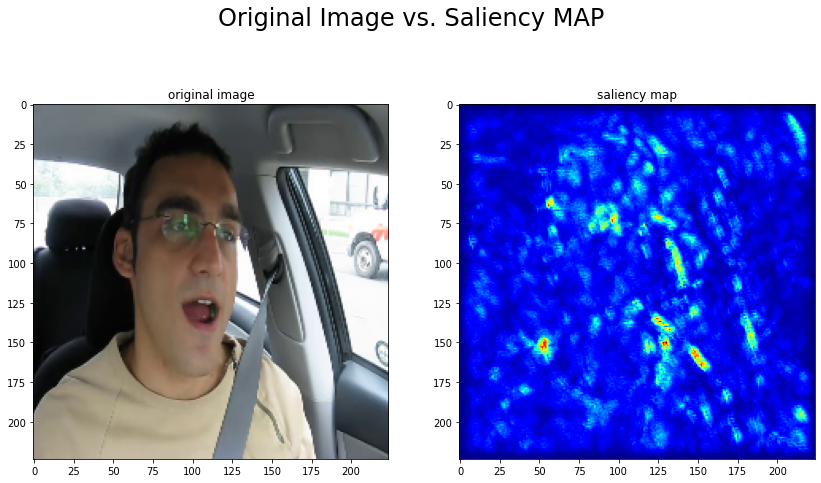

In [61]:
plot_smoothgrad_of_a_model(model_1,X_test[2])

# SECOND MODEL:

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [63]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X.shape[1:]))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 111, 111, 128)     73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 128)     147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 128)      

In [64]:
model.compile(loss="sparse_categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [65]:
# Fit the model
history_1 = model.fit(X,y,# now 10 different classes 
                        epochs=20,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/20
85/85 [==============================] - 24s 216ms/step - loss: 2.7310 - accuracy: 0.4334 - val_loss: 0.6193 - val_accuracy: 0.7146
Epoch 2/20
85/85 [==============================] - 12s 146ms/step - loss: 0.5420 - accuracy: 0.7545 - val_loss: 0.5097 - val_accuracy: 0.7585
Epoch 3/20
85/85 [==============================] - 12s 146ms/step - loss: 0.4821 - accuracy: 0.7754 - val_loss: 0.4245 - val_accuracy: 0.8104
Epoch 4/20
85/85 [==============================] - 13s 147ms/step - loss: 0.3515 - accuracy: 0.8531 - val_loss: 0.4280 - val_accuracy: 0.8224
Epoch 5/20
85/85 [==============================] - 12s 147ms/step - loss: 0.2917 - accuracy: 0.8808 - val_loss: 0.4845 - val_accuracy: 0.8104
Epoch 6/20
85/85 [==============================] - 12s 146ms/step - loss: 0.2701 - accuracy: 0.8927 - val_loss: 0.3468 - val_accuracy: 0.8503
Epoch 7/20
85/85 [==============================] - 12s 147ms/step - loss: 0.1934 - accuracy: 0.9281 - val_loss: 0.3921 - val_accuracy: 0.8523

In [66]:
model.save('model2.h5')

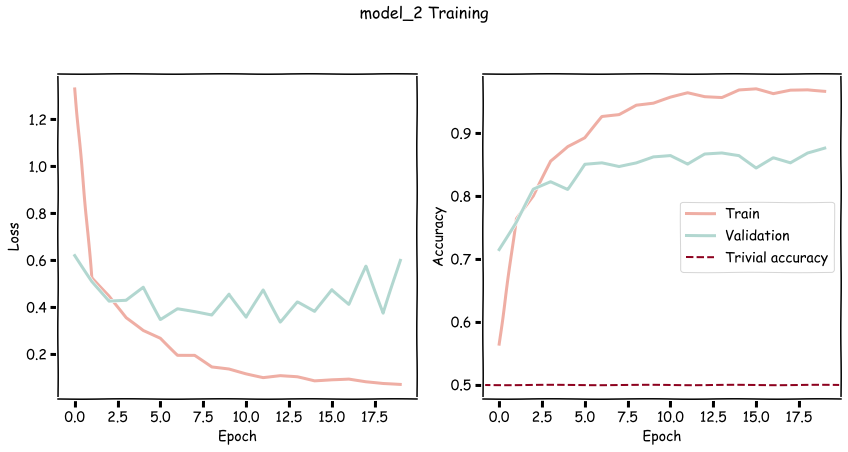

In [67]:
plot_history(history_1, 'model_2')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


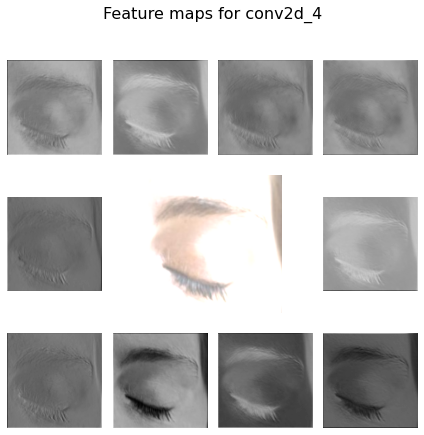

In [68]:
layer0_output = model.layers[0].output
activation_model = tf.keras.Model(inputs = model.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model.layers[0].name])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


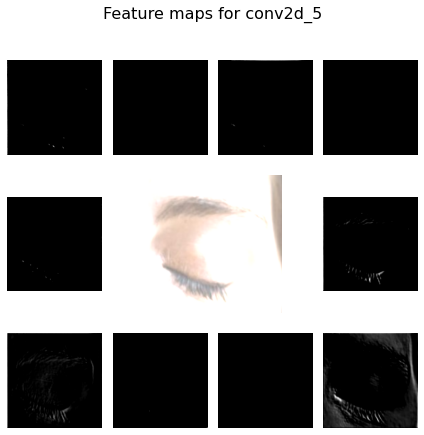

In [69]:
layer0_output = model.layers[1].output
activation_model = tf.keras.Model(inputs = model.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model.layers[1].name])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


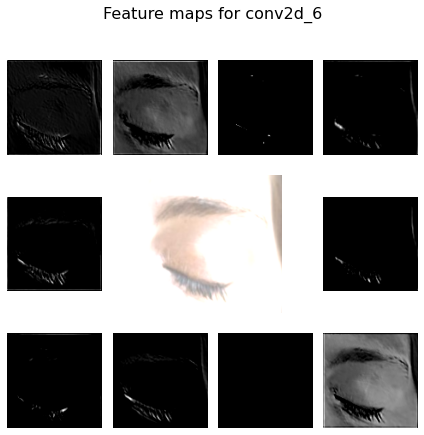

In [70]:
layer0_output = model.layers[4].output
activation_model = tf.keras.Model(inputs = model.input, outputs = layer0_output)
img = X_test[1].reshape(-1,224,224,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model.layers[4].name])

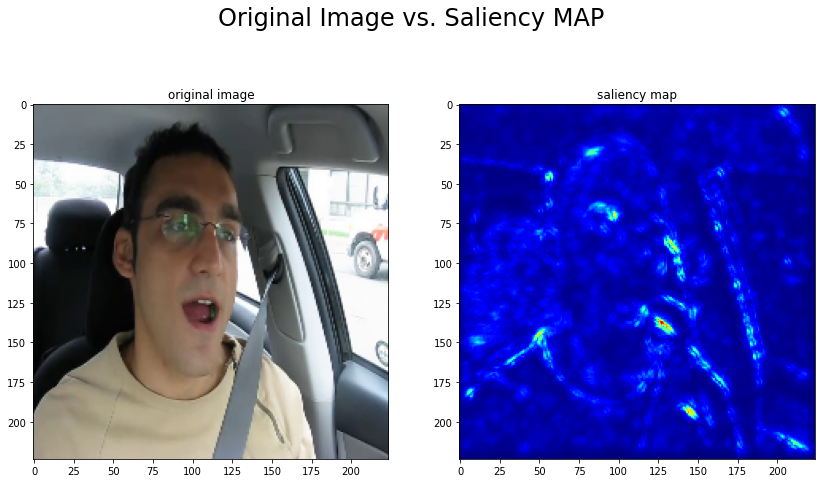

In [71]:
plot_smoothgrad_of_a_model(model,X_test[2])

In [65]:
#model = tf.keras.applications.mobilenet.MobileNet()

# TRANSFER LEARNING METHOD

The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data.


Transfer learning offers a number of advantages, the most important of which are reduced training time, improved neural network performance (in most circumstances), and the absence of a large amount of data.



# INCEPTION RESNET V2 MODEL:
Inception-ResNet-v2 is a convolutional neural architecture that builds on the Inception family of architectures but incorporates residual connections (replacing the filter concatenation stage of the Inception architecture).


SOURCE: chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Farxiv.org%2Fpdf%2F1512.00567v3.pdf&clen=517626&chunk=true

In [72]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
  
base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
  
model_3 = tf.keras.Sequential([ 
        base_model,   
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

In [73]:
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
batch_normalization_203 (Bat (None, 5, 5, 1536)        10752     
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               786944    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [74]:
model_3.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model


In [83]:
history_3=model_3.fit(X,y,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
68/68 [==============================] - 12s 171ms/step - loss: 0.0819 - accuracy: 0.9611 - val_loss: 0.1706 - val_accuracy: 0.9538
Epoch 2/20
68/68 [==============================] - 11s 169ms/step - loss: 0.0883 - accuracy: 0.9611 - val_loss: 0.2262 - val_accuracy: 0.9390
Epoch 3/20
68/68 [==============================] - 11s 169ms/step - loss: 0.0731 - accuracy: 0.9630 - val_loss: 0.2508 - val_accuracy: 0.9316
Epoch 4/20
68/68 [==============================] - 11s 169ms/step - loss: 0.0755 - accuracy: 0.9625 - val_loss: 0.1932 - val_accuracy: 0.9575
Epoch 5/20
68/68 [==============================] - 12s 170ms/step - loss: 0.0710 - accuracy: 0.9648 - val_loss: 0.2154 - val_accuracy: 0.9445
Epoch 6/20
68/68 [==============================] - 11s 169ms/step - loss: 0.0831 - accuracy: 0.9583 - val_loss: 0.2081 - val_accuracy: 0.9501
Epoch 7/20
68/68 [==============================] - 12s 170ms/step - loss: 0.0781 - accuracy: 0.9653 - val_loss: 0.2400 - val_accuracy: 0.9353

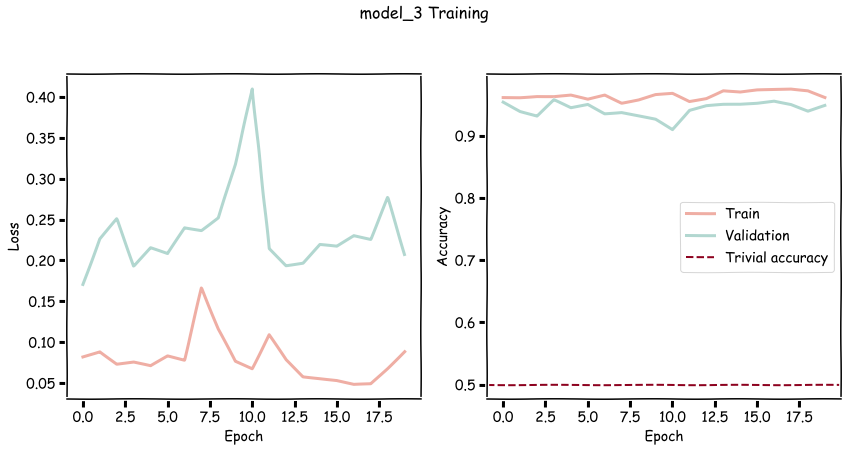

In [84]:
plot_history(history_3, 'model_3')

In [85]:
model_3.save('resnet1.h5')

In [86]:
model_3.save_weights('resnetweights.h5')

# IMAGE AUGMENTATION

 Image augmentation is a technique of altering the existing data to create some more data for the model training process. 
In other words, it is the process of artificially expanding the available dataset for training a deep learning model.

AUGMENTATION USED:
We have used following data augmentation techniques on our dataset:      
1. brightness_range - To generate images for night time/low light condition so that the model is able to perform even in such conditions. 
2. Roation: Drowsiness or other traffic issues can lead to driver's head bending by few degrees, to be able to capture that in our model we have used this method.  
3. zca_whitening - It helps remove redundent pixels from images and make them more detailed making it easy for the model to learn features.   
4. Horizontal and Vertical shift - Varying heights of drivers, vehicle condition etc can lead to face not being in front of the camera making it difficult for it to detect drowsiness. 
5. Zooming - Drivers depending on their height may be sitting too close or far away from the camera hence it has to be taken into account for the model to be able to learn better.

In [78]:
!pip install SciPy
import scipy  

In [79]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.2,0.7],brightness_range=[0.2,1.5],width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=False, rotation_range=30,zca_whitening= True, vertical_flip=False)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.2,0.7],brightness_range=[0.2,1.5],width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=False, rotation_range=30,zca_whitening= True,vertical_flip=False)
#train_generator.fit(X)
#test_generator.fit(X_test)
train_generator = train_generator.flow(X, y, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

C:\conda\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [80]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
  
base_model.trainable=False
# For freezing the layer we make use of layer.trainable = False
# means that its internal state will not change during training.
# model's trainable weights will not be updated during fit(),
# and also its state updates will not run.
  
model_4 = tf.keras.Sequential([ 
        base_model,   
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

In [81]:
model_4.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# categorical cross entropy is taken since its used as a loss function for
# multi-class classification problems where there are two or more output labels.
# using Adam optimizer for better performance
# other optimizers such as sgd can also be used depending upon the model


In [82]:
history_4 = model_4.fit(train_generator, epochs=10, validation_data=test_generator, shuffle=True)

C:\conda\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\conda\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
85/85 [==============================] - 48s 500ms/step - loss: 16.4407 - accuracy: 0.2501 - val_loss: 1.3717 - val_accuracy: 0.3413
Epoch 2/10
85/85 [==============================] - 26s 299ms/step - loss: 1.4893 - accuracy: 0.2824 - val_loss: 1.3365 - val_accuracy: 0.3493
Epoch 3/10
85/85 [==============================] - 26s 300ms/step - loss: 1.3905 - accuracy: 0.3027 - val_loss: 1.3413 - val_accuracy: 0.3393
Epoch 4/10
85/85 [==============================] - 26s 300ms/step - loss: 1.3639 - accuracy: 0.3116 - val_loss: 1.3218 - val_accuracy: 0.3214
Epoch 5/10
85/85 [==============================] - 26s 300ms/step - loss: 1.3666 - accuracy: 0.3184 - val_loss: 1.3443 - val_accuracy: 0.3174
Epoch 6/10
85/85 [==============================] - 26s 300ms/step - loss: 1.3670 - accuracy: 0.3032 - val_loss: 1.3215 - val_accuracy: 0.3533
Epoch 7/10
85/85 [==============================] - 26s 301ms/step - loss: 1.3619 - accuracy: 0.3344 - val_loss: 1.2750 - val_accuracy: 0.389

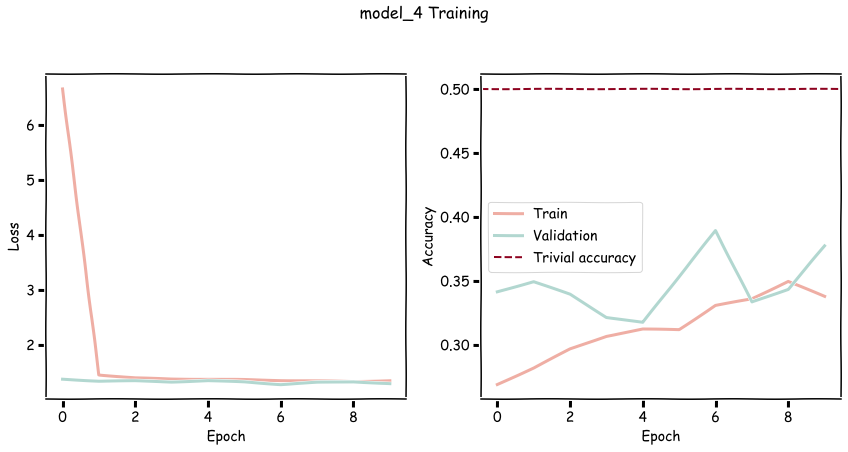

In [87]:
history_4=plot_history(history_4, 'model_4')

In [88]:
model_4.save('resnet2_with_aug.h5')
model_4.save_weights('resnet2_with_aug_weights.h5')


In [89]:
y_pred=[]

for i in X_test:
    y_pred.append(model_4.predict(np.expand_dims(i,axis=0)).argmax())

In [92]:
confusion_matrix(y_test,y_pred)

array([[  8,   0, 111,   0],
       [  0,   0, 130,   0],
       [ 29,   0, 115,   0],
       [  0,   0, 108,   0]], dtype=int64)

<AxesSubplot:>

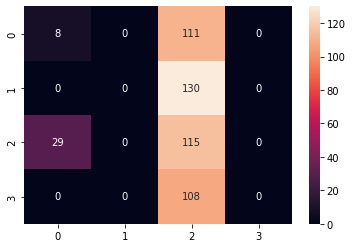

In [93]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='')

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.22      0.07      0.10       119
           1       0.00      0.00      0.00       130
           2       0.25      0.80      0.38       144
           3       0.00      0.00      0.00       108

    accuracy                           0.25       501
   macro avg       0.12      0.22      0.12       501
weighted avg       0.12      0.25      0.13       501



C:\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\conda\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\conda\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\conda\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


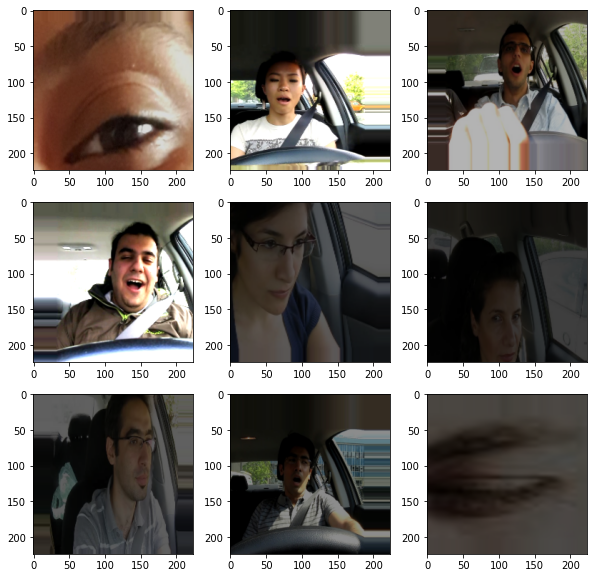

In [95]:
imageDataGenerator_obj = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.1,2], zca_whitening= True,
                                            width_shift_range= 0.2, height_shift_range = 0.2, 
                                            rotation_range= 0.3, zoom_range = 0.3)
iterator = imageDataGenerator_obj.flow(X, batch_size=1)
plt.figure(figsize = (10,10))
for j in range(9):

    plt.subplot(330 + 1 + j)
    
    chunk = iterator.next()

    sub_img = chunk[0].astype('uint8')

    plt.imshow(sub_img) 
plt.show()

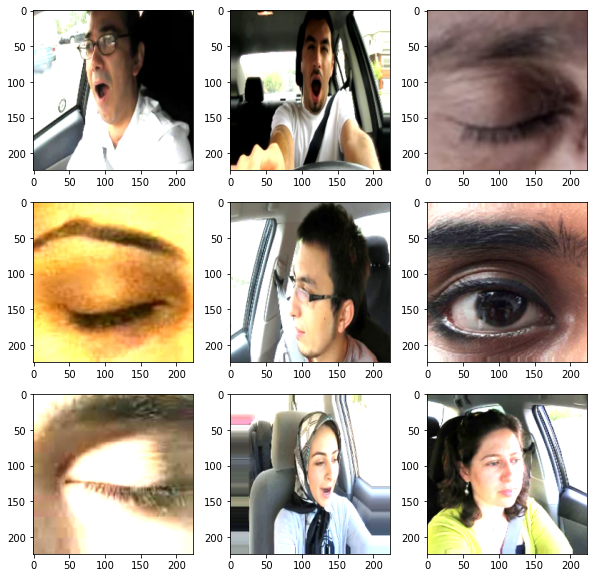

In [96]:
imageDataGenerator_obj = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.1,2],horizontal_flip=True,zoom_range=0.3)
iterator = imageDataGenerator_obj.flow(X, batch_size=32)
plt.figure(figsize = (10,10))
for j in range(9):

    plt.subplot(330 + 1 + j)
    
    chunk = iterator.next()

    sub_img = chunk[0].astype('uint8')

    plt.imshow(sub_img) 
plt.show()

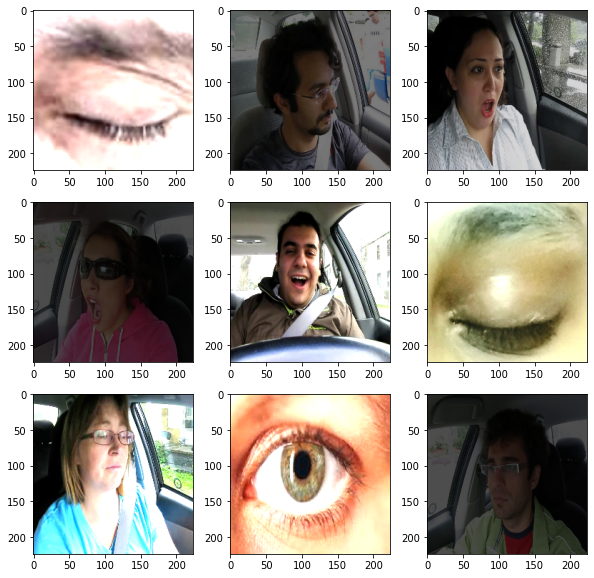

In [97]:
imageDataGenerator_obj = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.1,2],horizontal_flip=True)
iterator = imageDataGenerator_obj.flow(X, batch_size=32)
plt.figure(figsize = (10,10))
for j in range(9):

    plt.subplot(330 + 1 + j)
    
    chunk = iterator.next()

    sub_img = chunk[0].astype('uint8')

    plt.imshow(sub_img) 
plt.show()

In [98]:
import os
import cv2

### Model with taking only face images 

In [99]:
def face_for_yawn(direc=r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train", face_cas_path=r"C:\Users\Sai_Pg_Lab_WS\Downloads\opencv-master\data\haarcascades\haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


### Reference for cascade- https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [100]:
def get_data(dir_path=r"C:\Users\Sai_Pg_Lab_WS\Downloads\dataset_new\train", face_cas=r"C:\Users\Sai_Pg_Lab_WS\Downloads\opencv-master\data\haarcascades\haarcascade_frontalface_default.xml", eye_cas=r"C:\Users\Sai_Pg_Lab_WS\Downloads\opencv-master\data\haarcascades\haarcascade_eye.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [101]:
import numpy as np

In [102]:
data_train = get_data()
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)
new_data = append_data()

2
3
0
1
2
3


C:\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [103]:
X = []
y = []
for features, label in new_data:
  X.append(features)
  y.append(label)

In [104]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [105]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
y = np.array(y)

In [106]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD

In [108]:
!pip install SciPy
import scipy 

In [109]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, zoom_range=0.2,brightness_range=[0.2,1.5], rotation_range=30)
#train_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.2,0.7],brightness_range=[0.2,1.5],width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=False, rotation_range=30,zca_whitening= True, vertical_flip=False)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
#test_generator = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=[0.2,0.7],brightness_range=[0.2,1.5],width_shift_range=0.2,height_shift_range=0.2, horizontal_flip=False, rotation_range=30,zca_whitening= True,vertical_flip=False)
#train_generator.fit(X)
#test_generator.fit(X_test)
train_generator = train_generator.flow(X_train, y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [160]:
from tensorflow.keras.preprocessing.image import array_to_img
img1 = array_to_img(train_generator[0][0][30],scale=True)
y = np.clip(img1,0,255)

In [149]:
print(train_generator[1][1][5].shape)

(4,)


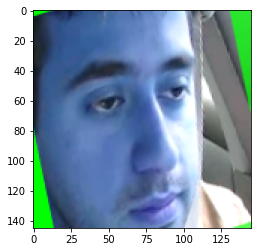

In [161]:
plt.imshow(y)

In [110]:
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(145, 145, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [111]:
history = model_1.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
42/42 [==============================] - 12s 214ms/step - loss: 1.1278 - accuracy: 0.4764 - val_loss: 0.7017 - val_accuracy: 0.6796
Epoch 2/50
42/42 [==============================] - 5s 125ms/step - loss: 0.5155 - accuracy: 0.7925 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 3/50
42/42 [==============================] - 5s 123ms/step - loss: 0.4463 - accuracy: 0.7995 - val_loss: 0.4284 - val_accuracy: 0.8372
Epoch 4/50
42/42 [==============================] - 5s 127ms/step - loss: 0.3889 - accuracy: 0.8381 - val_loss: 0.4062 - val_accuracy: 0.8549
Epoch 5/50
42/42 [==============================] - 5s 125ms/step - loss: 0.4198 - accuracy: 0.8377 - val_loss: 0.3752 - val_accuracy: 0.8478
Epoch 6/50
42/42 [==============================] - 5s 126ms/step - loss: 0.3404 - accuracy: 0.8698 - val_loss: 0.4234 - val_accuracy: 0.8265
Epoch 7/50
42/42 [==============================] - 5s 127ms/step - loss: 0.3230 - accuracy: 0.8673 - val_loss: 0.3880 - val_accuracy: 0.8425
Epoch

In [116]:
model_1.save('cropping_face_with_aug.h5')
model_1.save_weights('cropping_face_aug_weights.h5')

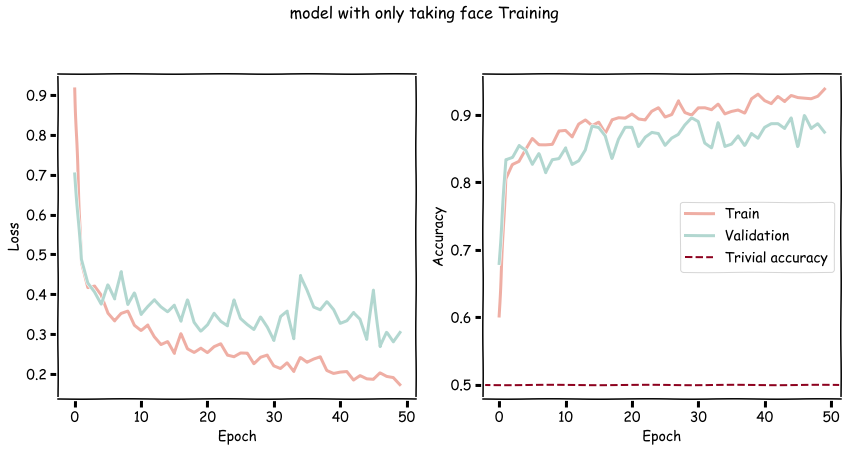

In [112]:
plot_history(history, 'model with only taking face')

In [113]:
def plot_smoothgrad_of_a_model(model, X):
    score = CategoricalScore([1])

    # Create Saliency visualization object
    saliency = Saliency(model,
                        model_modifier=ReplaceToLinear(),
                        clone=True)

    # Generate saliency map
    saliency_map = saliency(score, X.reshape(-1,145,145,3))
                            #smooth_samples=20) # The number of calculating gradients iterations
                            #smooth_noise=0.20) # noise spread level)

    # Render
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
    #for i, title in enumerate(image_titles):
        #ax[i].set_title(title, fontsize=16)
    ax[0].imshow(X)
    ax[0].set_title('original image')
    ax[1].imshow(saliency_map[0],cmap='jet')
    ax[1].set_title('saliency map')
    fig.suptitle('Original Image vs. Saliency MAP', fontsize = 24)
    #plt.tight_layout()
    plt.show()

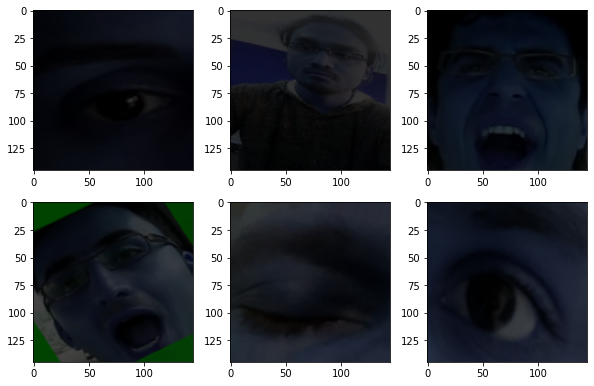

In [114]:


imageDataGenerator_obj = tf.keras.preprocessing.image.ImageDataGenerator( zoom_range=0.2,brightness_range=[0.2,0.3], rotation_range=30)
iterator = imageDataGenerator_obj.flow(X_train, batch_size=1)
plt.figure(figsize = (10,10))
for j in range(6):

    plt.subplot(330 + 1 + j)
    
    chunk = iterator.next()

    sub_img = chunk[0].astype('uint8')

    plt.imshow(sub_img) 
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


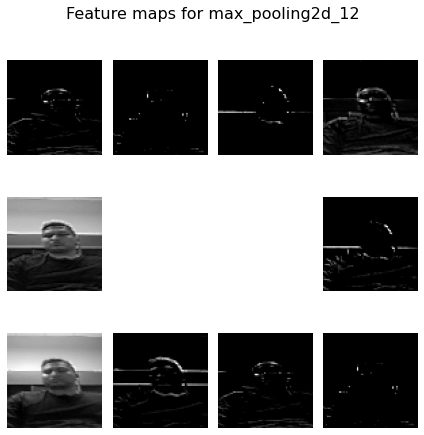

In [118]:
layer0_output = model_1.layers[2].output
activation_model = tf.keras.Model(inputs = model_1.input, outputs = layer0_output)
img = X_test[59].reshape(-1,145,145,3)
activations = activation_model.predict(img)
plot_featuremaps(img,activations,[model_1.layers[2].name])

# CONCLUSION :
    

1. WE CAN EFFECTIVELY PREDICT THE CONDITION OF THE DRIVER USING CNN MODELS.
2. THE PERFORMANCE OF THE MODEL DEPENDS UPON PRIMARILY ON THE TYPE OF DATA BEING USED TO TRAIN THE MODEL.
3. OUR BASE LINE MODEL IS PERFORMING BETTER THAN OTHER MODELS WITH IMAGE AUGMENTATION.THE REASON BEHIND IT MAY BE DUE TO SMALL AMOUNT OF TRAINING DATA AND LACK OF VARIATIONS IN TRAINING DATA.
4. BY USING FEATURE MAPS, SALIENCY MAPS,GRAD CAM WE CAN ACTUALLY FAIRLY EXPLAIN OUR MODELS. THE INTERPRETATION OF THE MODELS HELPED US TO UNDERSTAND WHICH ARE THE IMPORTANT FEATURES CNN MODEL IS FOCUSING ON.
5. With face cropping our accuracy increases to 82% with augmentation